## Land Square Feet vs. Gross Square Feet

In [7]:
# Imports
import functions as fc
import matplotlib.pyplot as plt

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales1.csv")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
#print(sales_frame.dtypes)

# determining how many sales have no information about the size of the property
land_zero = sales_frame[sales_frame["LAND SQUARE FEET"] == 0]
#print(len(land_zero))
gross_zero = sales_frame[sales_frame["GROSS SQUARE FEET"] == 0]
#print(len(gross_zero))

# creating new dataframe without zero values in both columns
both_not_zero = sales_frame[(sales_frame["LAND SQUARE FEET"] > 0) & (sales_frame["GROSS SQUARE FEET"] >= 0)]
#print(both_not_zero)

### Top Gross Square Feet

The biggest property sold regarding its gross value is 348438.74 square feet.
         BOROUGH  VALUE COUNTS
0      Manhattan            50
1      The Bronx            18
2       Brooklyn            15
3         Queens            13
4  Staten Island             4
This indicates that over 50% of the top 100 properties by 'GROSS SQUARE FEET' are located in Manhattan (50)


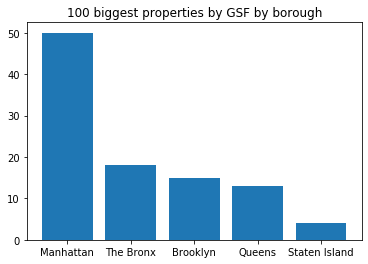

In [8]:
# determining max value for gsf
gross_max = sales_frame["GROSS SQUARE FEET"].max()
gross_max_qm = fc.to_qm(gross_max)
print("The biggest property sold regarding its gross value is ", round(gross_max_qm, 2), " square feet.", sep="")
#print(sales_frame[sales_frame["GROSS SQUARE FEET"] == sales_frame["GROSS SQUARE FEET"].max()])

# getting dataframe of top 50 gsf values
gross_square_max = sales_frame.nlargest(100, "GROSS SQUARE FEET")

# grouping dataframe of top 50 gsf values by borough
gross_max_borough = gross_square_max.groupby(["BOROUGH"])
gross_max_by_borough = gross_max_borough["GROSS SQUARE FEET"].count().reset_index(name="VALUE COUNTS")
gross_max_by_borough = gross_max_by_borough.sort_values(["VALUE COUNTS"], ascending= [False])
gross_max_by_borough = gross_max_by_borough.reset_index(drop=True)
print(gross_max_by_borough)
print("This indicates that over 50% of the top 100 properties by 'GROSS SQUARE FEET' are located in ", gross_max_by_borough["BOROUGH"].iloc[0], " (", gross_max_by_borough["VALUE COUNTS"].max(), ")", sep="")

# plotting biggest properties by gsf values
xs = gross_max_by_borough["BOROUGH"]
ys = gross_max_by_borough["VALUE COUNTS"]

plt.bar(xs, ys)
plt.title("100 biggest properties by GSF by borough")
plt.savefig("data/100 biggest properties by GSF by borough.jpg", bbox_inches="tight")
plt.show()

### Top Land Square Feet

The biggest property sold regarding its land value is 395053.94 square feet.
         BOROUGH  VALUE COUNTS
0       Brooklyn            24
1         Queens            20
2  Staten Island            13
3      The Bronx            13
4      Manhattan             6
This, along with the GSF result, indicates that Manhattan has rather small properties measured by land area but those properties are built tall to compensate for that.
The mean value for the size of the properties is 457.71m2 for the buildings placed on the property and 409.91m2 for the land area of the property.


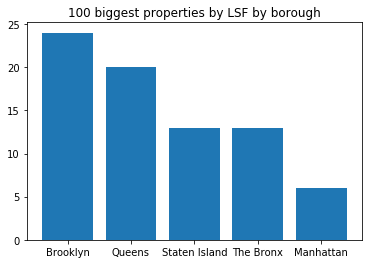

In [9]:
# determining max value for lsf
land_max = sales_frame["LAND SQUARE FEET"].max()
land_max_qm = fc.to_qm(land_max)
print("The biggest property sold regarding its land value is ", round(land_max_qm, 2), " square feet.", sep="")
#print(sales_frame[sales_frame["LAND SQUARE FEET"] == sales_frame["LAND SQUARE FEET"].max()])

# getting dataframe of top 50 lsf values
land_square_max = sales_frame.nlargest(100, "LAND SQUARE FEET")

# grouping dataframe of top 50 lsf values by borough
land_max_borough = land_square_max.groupby(["BOROUGH"])
land_max_by_borough = land_max_borough["GROSS SQUARE FEET"].count().reset_index(name="VALUE COUNTS")
land_max_by_borough = land_max_by_borough.sort_values(["VALUE COUNTS"], ascending= [False])
land_max_by_borough = land_max_by_borough.reset_index(drop=True)
print(land_max_by_borough)
print("This, along with the GSF result, indicates that ", land_max_by_borough["BOROUGH"].iloc[4], " has rather small properties measured by land area but those properties are built tall to compensate for that.", sep="")

# plotting biggest properties by gsf values
xs = land_max_by_borough["BOROUGH"]
ys = land_max_by_borough["VALUE COUNTS"]

plt.bar(xs, ys)
plt.title("100 biggest properties by LSF by borough")
plt.savefig("data/100 biggest properties by LSF by borough.jpg", bbox_inches="tight")
plt.show()

# determining mean values for gsf and lsf (with dataframe without zeros in both columns)
land_mean = both_not_zero["LAND SQUARE FEET"].mean()
land_mean_qm = fc.to_qm(land_mean)
gross_mean = both_not_zero["GROSS SQUARE FEET"].mean()
gross_mean_qm = fc.to_qm(gross_mean)

print("The mean value for the size of the properties is ", round(gross_mean_qm, 2), "m2 for the buildings placed on the property and ", round(land_mean_qm, 2), "m2 for the land area of the property.", sep="")
